<a href="https://colab.research.google.com/github/stefymojica/Proyecto_ML/blob/master/markeing_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MARKETING DIGITAL**


---











Objetivo: Crear un modelo predictivo que permita predecir el CTR(click throught rate)

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import export_graphviz
from sklearn.tree import export_text

## Lectura de datos

In [76]:
XY = pd.read_csv("https://proyectosmachinelearning.s3.us-east-2.amazonaws.com/Base_proyecto.csv")

In [77]:
XY.head()

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions,ctr
0,1,FULLSCREEN,320x480,21,UNITY,WIFI,APP,-1,Other,UNKNOWN,6,29,0.206897
1,2,FULLSCREEN,320x480,23,UNITY,WIFI,APP,-1,com.wordgame.puzzle.board.es,UNKNOWN,13,86,0.151163
2,3,0,320x480,23,OPERA_MEDIA,CELL_3G,APP,Claro,com.jamendoandoutly.mainpakkage,UNKNOWN,0,11,0.000000
3,4,FULLSCREEN,320x480,23,MOPUB,CELL_4G,APP,Movistar,com.drilens.wamr,UNKNOWN,0,38,0.000000
4,5,0,320x480,5,OPERA_MEDIA,WIFI,APP,Movistar,com.jam.endo,UNKNOWN,0,19,0.000000


In [78]:
print(u'- El numero de filas en el dataset es: {}'.format(XY.shape[0]))
print(u'- El numero de columnas en el dataset es: {}'.format(XY.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY.columns)))

- El numero de filas en el dataset es: 41352
- El numero de columnas en el dataset es: 13
- Los nombres de las variables son: ['id', 'ad_position', 'ad_size', 'hour_of_day_utc', 'inventory_source', 'platform_bandwidth', 'environment_type', 'platform_carrier', 'app_bundle', 'domain', 'clicks', 'impressions', 'ctr']


In [79]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41352 entries, 0 to 41351
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  41352 non-null  int64  
 1   ad_position         41352 non-null  object 
 2   ad_size             41352 non-null  object 
 3   hour_of_day_utc     41352 non-null  int64  
 4   inventory_source    41352 non-null  object 
 5   platform_bandwidth  41352 non-null  object 
 6   environment_type    41352 non-null  object 
 7   platform_carrier    41352 non-null  object 
 8   app_bundle          41352 non-null  object 
 9   domain              41352 non-null  object 
 10  clicks              41352 non-null  int64  
 11  impressions         41352 non-null  int64  
 12  ctr                 41352 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 4.1+ MB


## Preprocesamiento de datos

In [80]:
XY.isnull().sum()

id                    0
ad_position           0
ad_size               0
hour_of_day_utc       0
inventory_source      0
platform_bandwidth    0
environment_type      0
platform_carrier      0
app_bundle            0
domain                0
clicks                0
impressions           0
ctr                   0
dtype: int64

In [81]:
XY.isnull().any()

id                    False
ad_position           False
ad_size               False
hour_of_day_utc       False
inventory_source      False
platform_bandwidth    False
environment_type      False
platform_carrier      False
app_bundle            False
domain                False
clicks                False
impressions           False
ctr                   False
dtype: bool

## Categoricas a numericas

In [82]:
XY.select_dtypes(exclude=['number']).columns

Index(['ad_position', 'ad_size', 'inventory_source', 'platform_bandwidth',
       'environment_type', 'platform_carrier', 'app_bundle', 'domain'],
      dtype='object')

In [83]:
le =  LabelEncoder()

In [84]:
# ad_position

XY['ad_position'].value_counts()

FULLSCREEN          30357
0                    7132
ABOVE_THE_FOLD       3063
POSITION_UNKNOWN      605
BELOW_THE_FOLD        171
FOOTER                 23
HEADER                  1
Name: ad_position, dtype: int64

In [85]:
XY.ad_position = le.fit_transform(XY.ad_position.values)

In [86]:
# ad_size

XY['ad_size'].value_counts()

320x480     28294
320x50       4656
480x320      3940
300x250      2729
300x50        626
728x90        380
300x600       295
320x100       102
-1x-1         102
300x480        52
336x280        38
411x64         34
360x56         25
160x600        21
250x250        19
300x100        13
768x1024        4
320x568         4
414x736         3
375x667         2
412x814         2
400x824         1
424x808         1
412x790         1
360x703         1
370x58          1
360x592         1
320x570         1
360x640         1
360x598         1
256x192         1
1x1             1
Name: ad_size, dtype: int64

In [87]:
XY.ad_size = le.fit_transform(XY.ad_size.values)

In [88]:
# inventory_source

XY['inventory_source'].value_counts()

UNITY            25201
MOPUB             6282
OPERA_MEDIA       3267
TRIPLELIFT        2948
SMARTADSERVER     1247
RUBICON            996
VERVE              583
GOOGLE_ADX         361
CRITEO             324
INMOBI              54
APPNEXUS            48
OPENX               15
RICHAUDIENCE        14
UNRULYX             10
MILLENNIAL           1
INNERACTIVE          1
Name: inventory_source, dtype: int64

In [89]:
XY.inventory_source = le.fit_transform(XY.inventory_source.values)

In [90]:
# platform_bandwidth

XY['platform_bandwidth'].value_counts()

WIFI                  25812
CONNECTION_UNKNOWN     5107
CELL_4G                4377
UNKNOWN                3871
CELL_3G                1322
CELL_UNKNOWN            781
CELL_2G                  65
ETHERNET                 17
Name: platform_bandwidth, dtype: int64

In [91]:
XY.loc[XY['platform_bandwidth'] != 'WIFI', 'platform_bandwidth'] = 0
XY.loc[XY['platform_bandwidth'] == 'WIFI', 'platform_bandwidth'] = 1
XY['platform_bandwidth'] = XY['platform_bandwidth'].astype(int)

In [92]:
# environment_type

XY['environment_type'].value_counts()

APP        37923
WEB         3329
UNKNOWN      100
Name: environment_type, dtype: int64

In [93]:
XY.environment_type = le.fit_transform(XY.environment_type.values)

In [94]:
# platform_carrier

XY['platform_carrier'].value_counts()

-1          21382
Movistar     7170
Claro        6406
Tigo         6379
Avantel        15
Name: platform_carrier, dtype: int64

In [95]:
XY.platform_carrier = le.fit_transform(XY.platform_carrier.values)

In [96]:
# app_bundle

XY['app_bundle'].value_counts()

Other                              25857
UNKNOWN                             3435
com.jamendoandoutly.mainpakkage      424
com.merge.cube.winner                411
com.callapp.contacts                 342
                                   ...  
com.zareklamy                         85
com.superbox.aos.fire2048             85
com.movinapp.dict.french.free         84
com.mobz.vd.in                        83
com.firsttouchgames.hero2             83
Name: app_bundle, Length: 86, dtype: int64

In [97]:
XY.app_bundle = le.fit_transform(XY.app_bundle.values)


In [98]:
# domain

XY['domain'].value_counts()

UNKNOWN                      36239
Other                          611
rtbplus.smartadserver.com      544
callapp.com                    342
itunes.apple.com               195
                             ...  
absolutelyconnected.com         10
lavidalucida.com                10
ahoramismo.com                  10
hi5.com                         10
b612.snow.me                    10
Name: domain, Length: 94, dtype: int64

In [99]:
XY.domain = le.fit_transform(XY.domain.values)

## Comprobacion de datos numericos

In [100]:
XY.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

# Division en features X y target Y

In [101]:
X = XY.drop('ctr', axis=1)
Y = XY['ctr']

# Visualizaciones y correlaciones

In [102]:
XY.describe()

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions,ctr
count,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000
mean,61397.057724,3.108362,12.590927,9.012309,11.144008,0.624202,0.163426,1.447403,14.094216,6.353042,0.776601,28.913426,0.123057
std,69941.193238,1.645254,5.853822,6.577073,2.995516,0.484334,0.545649,1.598057,22.633631,17.569232,2.196003,99.382481,0.292073
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,11498.750000,2.000000,11.000000,4.000000,8.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,7.000000,0.000000
50%,22938.500000,4.000000,11.000000,8.000000,13.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,11.000000,0.000000
75%,135533.250000,4.000000,11.000000,14.000000,13.000000,1.000000,0.000000,3.000000,16.000000,1.000000,1.000000,22.000000,0.062500
max,209561.000000,6.000000,31.000000,23.000000,15.000000,1.000000,2.000000,4.000000,85.000000,93.000000,64.000000,3745.000000,1.000000


## Boxplot

In [103]:
X_normalizado = (X-X.mean())/X.std()

In [104]:
X_normalizado[:2]


,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions
0,-0.877824,0.541945,-0.271776,1.822648,0.61959,0.775907,-0.299508,-0.905727,-0.534347,-0.304683,2.378594,0.000871
1,-0.877810,0.541945,-0.271776,2.126735,0.61959,0.775907,-0.299508,-0.905727,2.249121,-0.304683,5.566204,0.574413


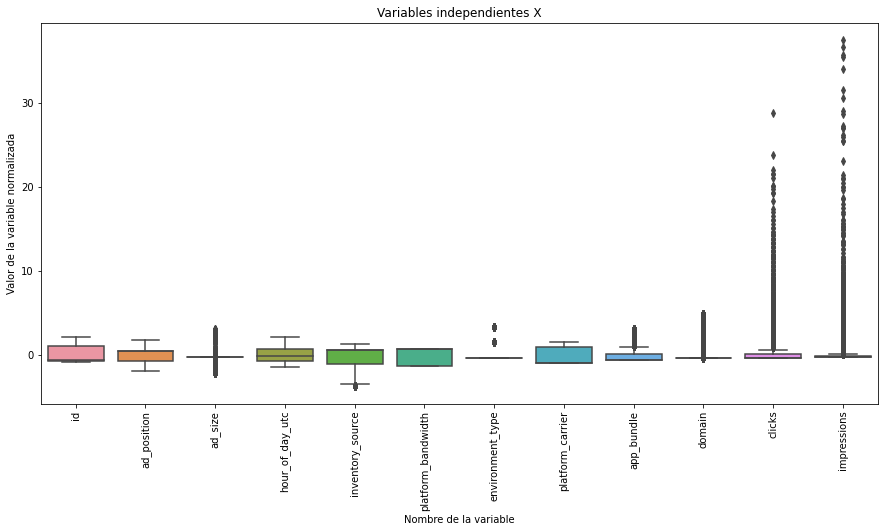

In [105]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_=plt.xlabel('Nombre de la variable')

## Histogramas

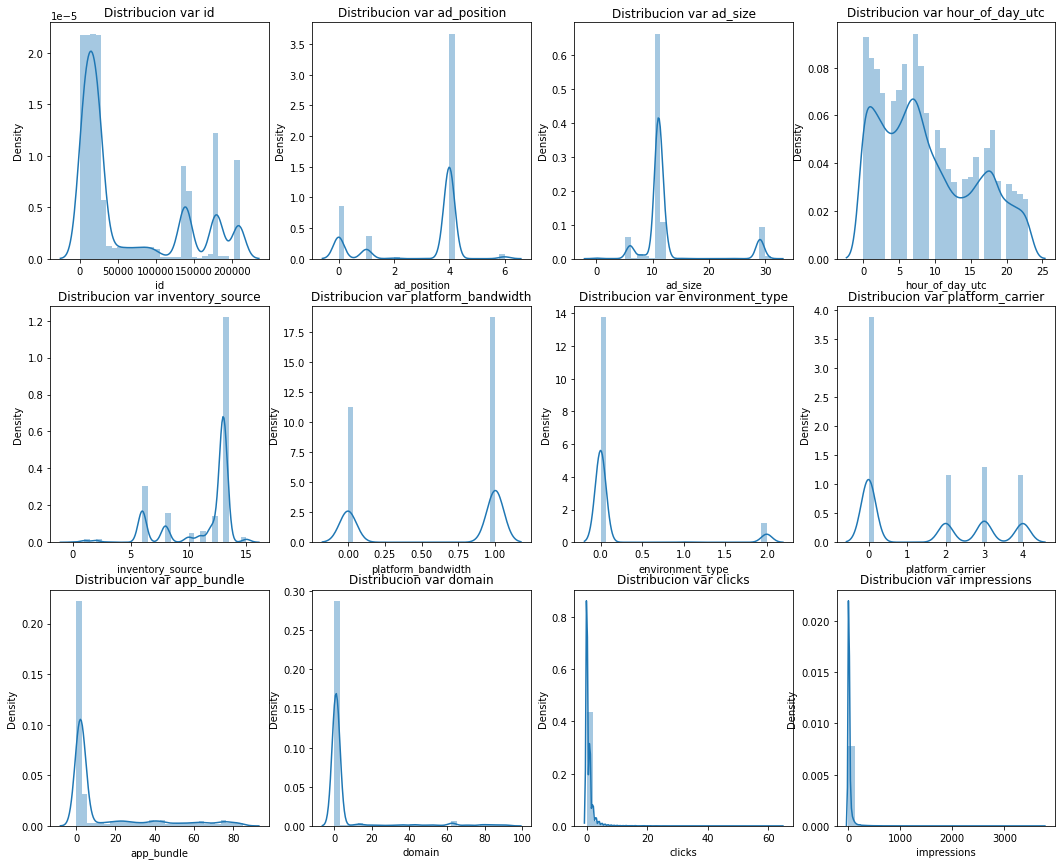

In [106]:
plt.figure(figsize=(18,20))
n = 0
for i, columns in enumerate(X.columns):
  n+=1
  plt.subplot(4, 4, n)
  sns.distplot(X[columns], bins=30)
  plt.title('Distribucion var {}'.format(columns))
plt.show()

# Relacion variable vs Target

In [107]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()


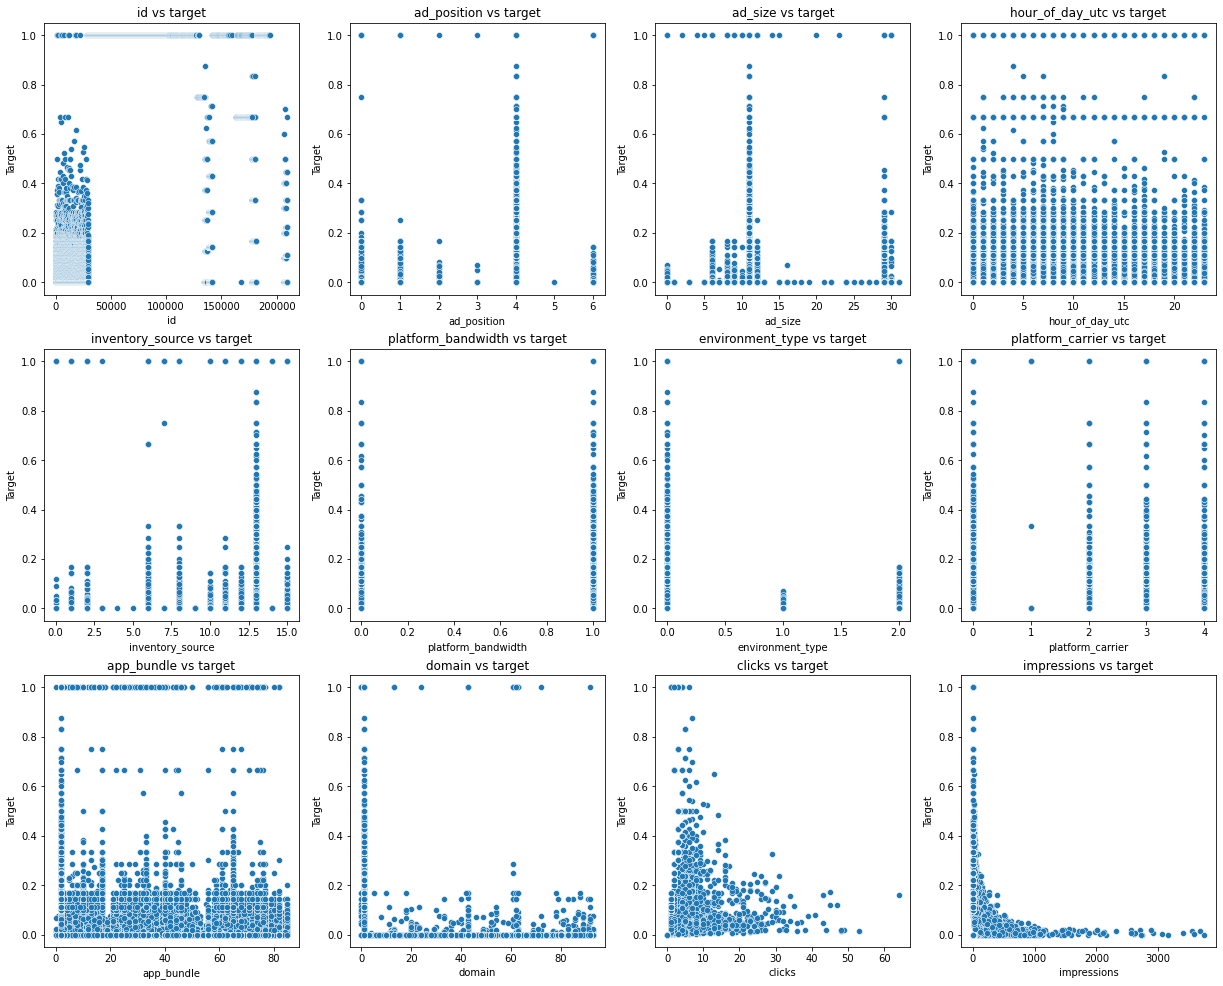

In [108]:
relaciones_vs_target(X,Y)

In [109]:
def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 


def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 4.; fig_tamanio = 4.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

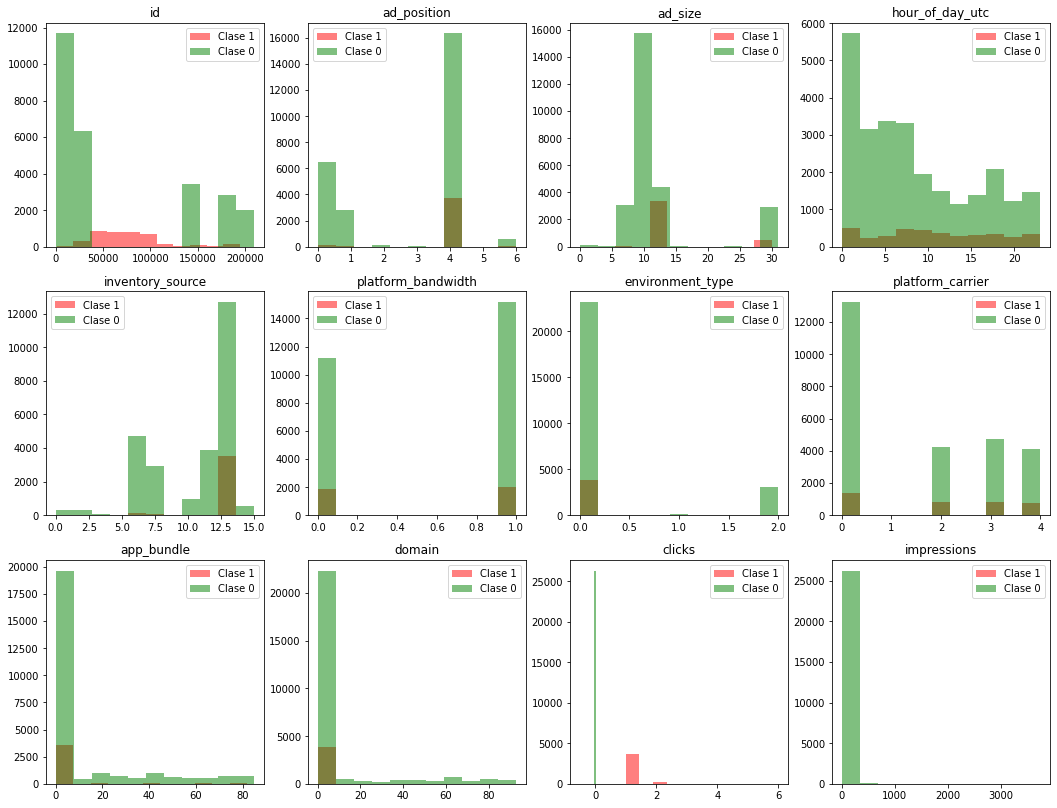

In [110]:
hist_pos_neg_feat(X, Y)

## Matriz de correlaciones


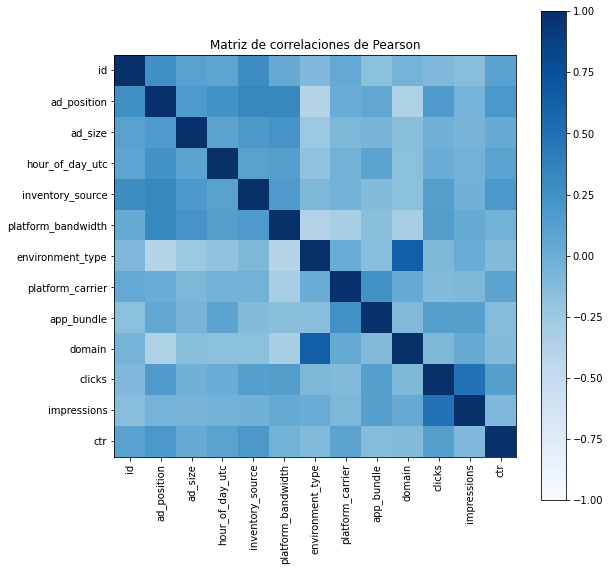

In [111]:
matriz_correlaciones = XY.corr(method='pearson')
n_ticks = len(XY.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), XY.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

# Variables con mayor correlacion con la target



In [112]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
ad_position,0.195657
inventory_source,0.194050
app_bundle,-0.131622
clicks,0.130151
domain,-0.117609
environment_type,-0.116143
id,0.106498
hour_of_day_utc,0.099155
impressions,-0.095824
platform_carrier,0.087248


# Estandarizacion de los datos

In [113]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

# Division en train y test


In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Modelo de regresion lineal

In [115]:
# Se crea un modelo de regresion lineal
modelo1 = linear_model.LinearRegression()


In [116]:
# Se entrena el modelo
modelo1.fit(X_train, Y_train)

LinearRegression()

In [117]:
# Se puede predecir usando el modelo
Y_pred = modelo1.predict(X_test)

In [118]:
print(modelo1.intercept_)


0.12346022594124313


In [119]:
print(modelo1.coef_)

[-0.00067642  0.03373342 -0.00271717  0.02127401  0.03234768 -0.05667673
 -0.03160262  0.02995636 -0.06481443 -0.01238257  0.0657654  -0.04015833]


In [120]:
# predicciones
y_test = np.array(list(Y_test))
y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,0.000000,0.199395
1,0.000000,0.063465
2,0.071429,0.054150
3,0.000000,0.014707
4,0.000000,0.070379
...,...,...
8266,0.000000,0.097129
8267,0.100000,0.187743
8268,1.000000,0.321675
8269,0.090909,0.179364


In [121]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Error cuadratico medio en test: %.2f' %mean_squared_error(Y_test, Y_pred))
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Estadistico R_2: %.2f' % r2_score(Y_test, Y_pred))


Error Absoluto Medio: 0.171212426069341
Error cuadratico medio en test: 0.07
Raíz del error cuadrático medio: 0.2677998696890812
Estadistico R_2: 0.15


# Modelo de Arboles de decision

In [138]:
# Division del dataset
X_train, X_test, Y_train, Y_test =  train_test_split(X_estandarizado, Y, random_state=5)

In [139]:
modelo2 = DecisionTreeRegressor()

In [154]:
# Entrenando el modelo
modelo2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [155]:
# Estructura del arbol creado
print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")

Profundidad del árbol: 22
Número de nodos terminales: 1474


In [178]:
# Predictores

importancia_predictores = pd.DataFrame(
    {'predictor':X.columns,
     'importancia': modelo2.feature_importances_}
)

print("Importancia de los predictores del modelo")
print("-----------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores del modelo
-----------------------------------------


,predictor,importancia
11,impressions,9.669970e-01
10,clicks,3.270873e-02
0,id,2.683099e-04
7,platform_carrier,1.198414e-05
3,hour_of_day_utc,8.449576e-06
8,app_bundle,5.112685e-06
4,inventory_source,3.505388e-07
5,platform_bandwidth,9.818159e-09
2,ad_size,2.050095e-09
1,ad_position,3.530365e-10


## Validacion cruzada

In [164]:
params = {"max_depth": range(3,7)}
regrs_opt = GridSearchCV(modelo2, params, cv=3)

In [165]:
regrs_opt.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(3, 7)})

In [167]:
print('El mejor estimador es: {}'.format(regrs_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=6)


Profundidad del árbol: 6
Número de nodos terminales: 22


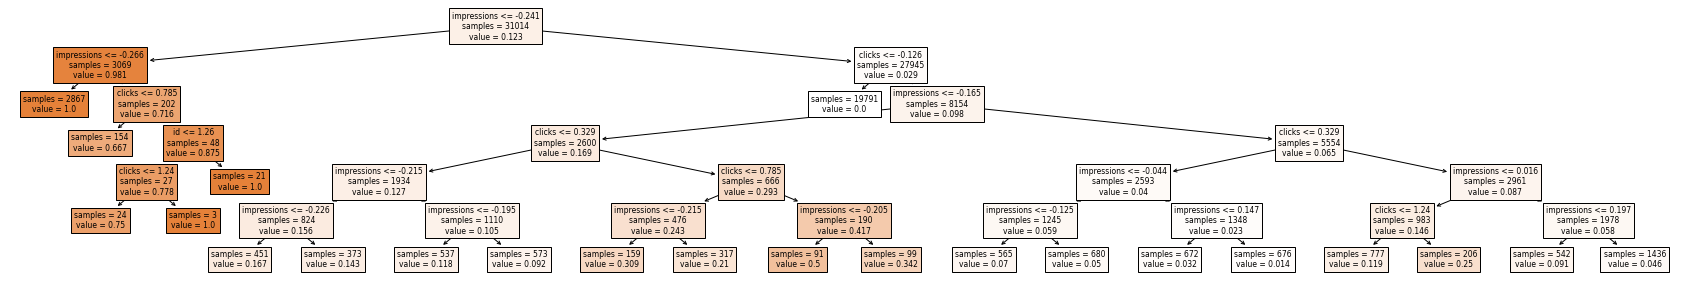

In [192]:
# Estructura del arbol creado
modelo_final2 = regrs_opt.best_estimator_
print(f"Profundidad del árbol: {modelo_final2.get_depth()}")
print(f"Número de nodos terminales: {modelo_final2.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(30, 5))
plot = plot_tree(
            decision_tree = modelo_final2,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            ax            = ax
       )

## Prediccion y evaluacion del modelo

In [193]:
predicciones = modelo2.predict(X = X_test)

rmse = mean_squared_error(
    y_true = Y_test,
    y_pred = predicciones,
    squared = False
)
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.004243646002015548


In [194]:
predicciones = modelo_final2.predict(X = X_test)

rmse = mean_squared_error(
    y_true = Y_test,
    y_pred = predicciones,
    squared = False
)
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.017685938890804817


El proceso de podado consigue reducir el error rmse del modelo de 0.00424 a 0.017. Las predicciones ultimo modelo de arbol de decision se alejan en promedio 0.017 unidades del valor real. 